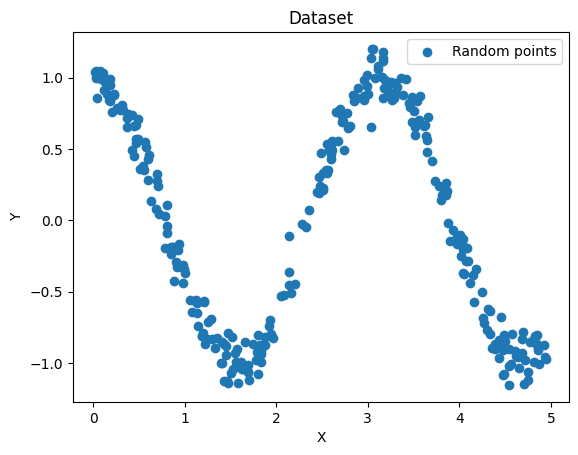

            X         Y
0    1.872701 -0.818622
1    4.753572 -1.061770
2    3.659970  0.723411
3    2.993292  1.019728
4    0.780093 -0.191905
..        ...       ...
295  2.611216  0.493024
296  3.849968  0.179410
297  1.079105 -0.644642
298  3.114452  1.062386
299  0.426737  0.491217

[300 rows x 2 columns]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
n_points = 300

X = np.random.rand(n_points, 1) * 5
epsilon = np.random.randn(n_points, 1) * 0.1

Y = np.cos(2 * X) + epsilon

plt.scatter(X, Y, label="Random points")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset")
plt.legend()
plt.show()

data = {
    'X': X.flatten(),
    'Y': Y.flatten()
}
df = pd.DataFrame(data)

print(df)

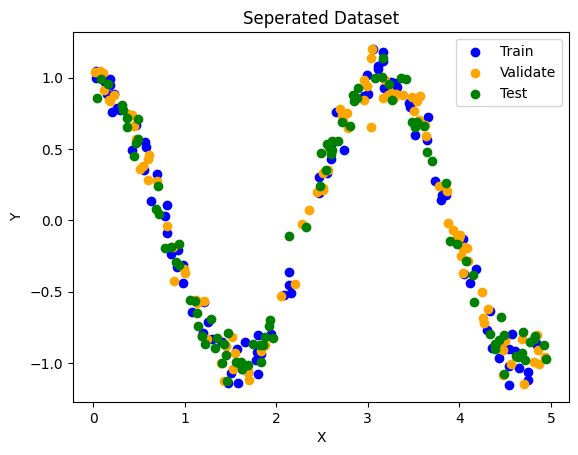

In [ ]:
indices = np.arange(n_points)
np.random.shuffle(indices)

train_size = n_points // 3
valid_size = n_points // 3

train_indices = indices[:train_size]
valid_indices = indices[train_size:train_size + valid_size]
test_indices = indices[train_size + valid_size:]

X_train, Y_train = X[train_indices], Y[train_indices]
X_valid, Y_valid = X[valid_indices], Y[valid_indices]
X_test, Y_test = X[test_indices], Y[test_indices]

plt.scatter(X_train, Y_train, label="Train", color='blue')
plt.scatter(X_valid, Y_valid, label="Validate", color='orange')
plt.scatter(X_test, Y_test, label="Test", color='green')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Seperated Dataset")
plt.legend()
plt.show()

Linear regression parametres : a =  -0.11795830727942067  b =  0.22506522481852426


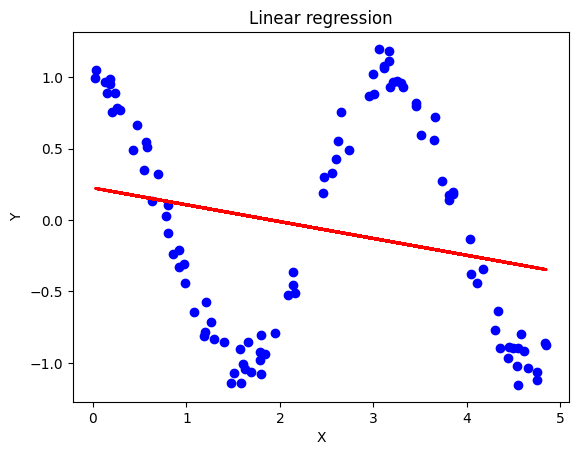

In [ ]:
mean_train_x = np.mean(X_train)
mean_train_y = np.mean(Y_train)

numerator = np.sum((X_train - mean_train_x) * (Y_train - mean_train_y))
denominator = np.sum((X_train - mean_train_x) ** 2)

a = numerator / denominator

b = mean_train_y - a * mean_train_x

Y_line = b + a * X_train

print("Linear regression parametres : a = ", a , " b = ", b)

plt.scatter(X_train, Y_train, label="Train", color='blue')
plt.plot(X_train, Y_line, label="Régression linéaire", color='red', linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear regression")
plt.show()

In [ ]:
print(X_train)
print(X_train.flatten())
print(sorted(X_train.flatten()))
X_poly = np.vander(sorted(X_train.flatten()), 4, increasing=True)
print(X_poly)

[[3.00557506]
 [4.84954926]
 [0.97621494]
 [4.57432195]
 [0.7799726 ]
 [3.80392524]
 [1.19780945]
 [3.11649063]
 [4.54660201]
 [4.30365292]
 [3.29992023]
 [4.54132943]
 [1.20926145]
 [3.80809808]
 [0.80814357]
 [2.74366895]
 [4.75357153]
 [1.07910514]
 [4.8332741 ]
 [4.35730295]
 [4.43543212]
 [0.70042008]
 [3.16152915]
 [1.69514896]
 [1.79745576]
 [0.5793453 ]
 [3.2481645 ]
 [2.64825289]
 [3.05926447]
 [0.18443474]
 [4.45002671]
 [4.49277094]
 [2.46258847]
 [0.20387571]
 [0.56736761]
 [0.63530256]
 [2.60034011]
 [1.80095321]
 [3.21015823]
 [0.15250125]
 [3.45947599]
 [4.04680578]
 [2.13553894]
 [1.57177991]
 [3.16764855]
 [0.02761059]
 [0.97991431]
 [4.03720078]
 [2.55671199]
 [0.42673732]
 [1.83857902]
 [4.17651248]
 [0.29041806]
 [0.92427228]
 [1.40467255]
 [3.11445238]
 [1.47224446]
 [3.84996777]
 [4.1130028 ]
 [4.74442769]
 [0.25739376]
 [1.79232864]
 [1.78376663]
 [1.18624544]
 [0.12709563]
 [3.65996971]
 [1.25891148]
 [2.95446472]
 [4.33088073]
 [3.85635173]
 [2.99329242]
 [2.13

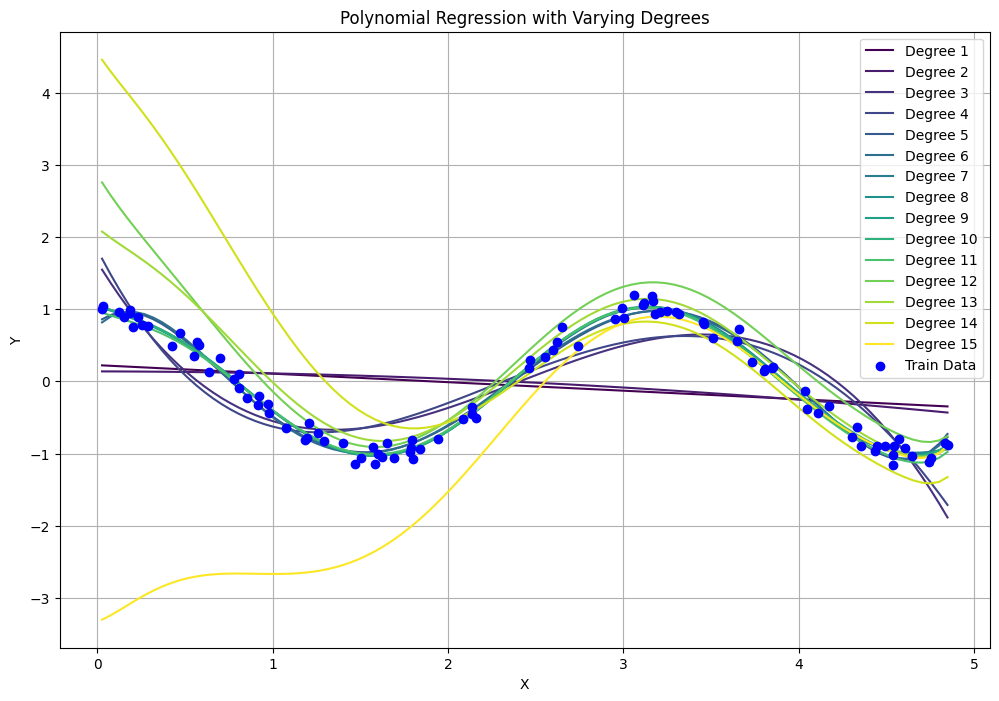

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'X': X_train.flatten(),
    'Y': Y_train.flatten()
}
df = pd.DataFrame(data)

df_sorted = df.sort_values(by='X', ascending=True)
X_train2 = df[['X']].values
Y_train2 = df['Y'].values

def deg_poly(X, Y, deg, lambda_reg=1e-5):
    X_poly = np.vander(X.flatten(), deg + 1, increasing=True)
    XTX = np.dot(X_poly.T, X_poly)
    XTY = np.dot(X_poly.T, Y)

    A_poly = np.dot(np.linalg.inv(XTX), XTY)
    return A_poly

plt.figure(figsize=(12, 8))

colors = plt.cm.viridis(np.linspace(0, 1, 15))

for i, deg in enumerate(range(1, 16)):
    A_poly = deg_poly(X_train2, Y_train2, deg)

    X_grid = np.linspace(min(X_train2), max(X_train2), 100).reshape(-1, 1)

    X_grid_poly = np.vander(X_grid.flatten(), deg + 1, increasing=True)

    Y_grid_pred = np.dot(X_grid_poly, A_poly.flatten())

    plt.plot(X_grid, Y_grid_pred, color=colors[i], label=f"Degree {deg}")

plt.scatter(X_train2, Y_train2, label="Train Data", color='blue', zorder=5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression with Varying Degrees")
plt.legend()
plt.grid(True)
plt.show()


0.575935643586659
0.574117575323365
0.1425502417537205
0.1380649125232104
0.0148857938178261
0.01460941185599427
0.009520091619716344
0.00937881243660681
0.009275993777778222
0.0092370664809945
0.010989948875765288
0.3008453161185689
0.15763079973631197
1.6437796902802189
3.2895460183208587
[0.575935643586659, 0.574117575323365, 0.1425502417537205, 0.1380649125232104, 0.0148857938178261, 0.01460941185599427, 0.009520091619716344, 0.00937881243660681, 0.009275993777778222, 0.0092370664809945, 0.010989948875765288, 0.3008453161185689, 0.15763079973631197, 1.6437796902802189, 3.2895460183208587]


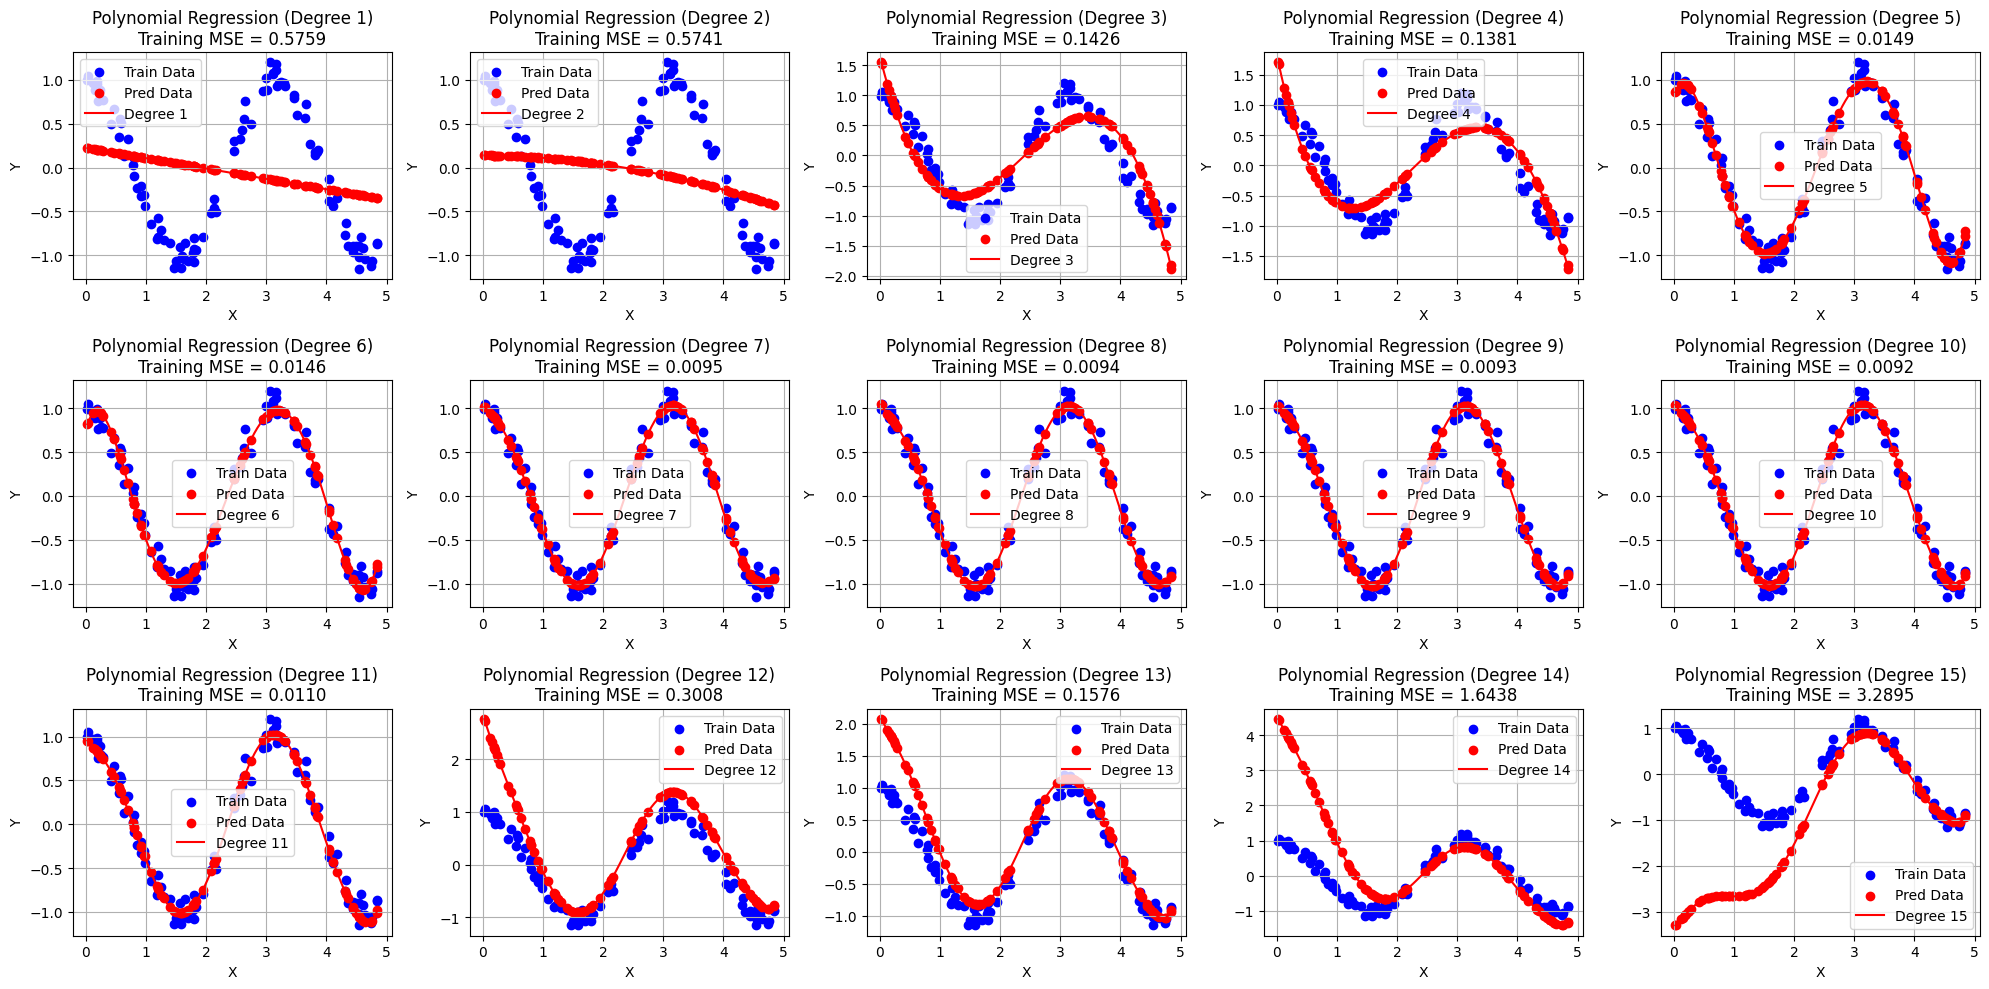

In [ ]:
num_per_line = 5
num_plots = 15

fig, axes = plt.subplots(nrows=(num_plots + num_per_line - 1) // num_per_line,
                         ncols=num_per_line, figsize=(20, 10))
train_mse = []

for i, deg in enumerate(range(1, 16)):
    A_poly = deg_poly(X_train, Y_train, deg)

    X_train_poly = np.vander(X_train.flatten(), deg + 1, increasing=True)
    X_grid = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
    X_grid_poly = np.vander(X_grid.flatten(), deg + 1, increasing=True)

    Y_train_pred = np.dot(X_train_poly, A_poly.flatten())
    Y_grid_pred = np.dot(X_grid_poly, A_poly.flatten())

    mse = np.mean((Y_train.flatten() - Y_train_pred.flatten()) ** 2)
    train_mse.append(mse)
    print(mse)

    ax = axes[i // num_per_line, i % num_per_line]
    ax.scatter(X_train, Y_train, color='blue', label="Train Data")
    ax.scatter(X_train, Y_train_pred, color='red', label="Pred Data")
    ax.plot(X_grid, Y_grid_pred, color='red', label=f"Degree {deg}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Polynomial Regression (Degree {deg})\nTraining MSE = {mse:.4f}")
    ax.legend()
    ax.grid(True)
print(train_mse)

plt.tight_layout()
plt.show()

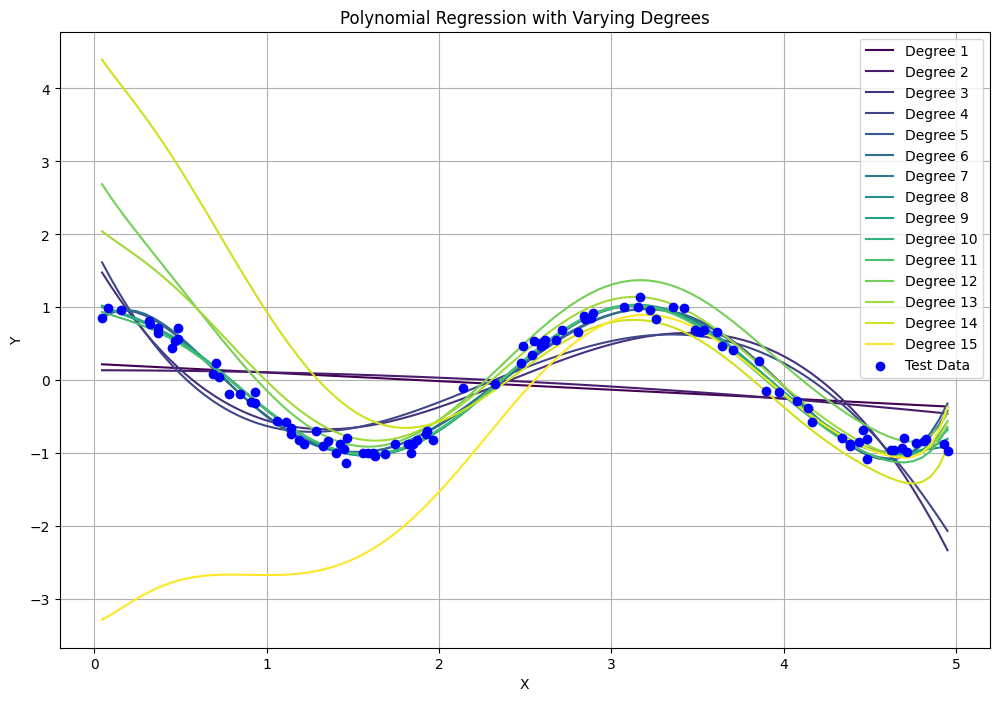

In [ ]:

data = {
    'X': X_test.flatten(),
    'Y': Y_test.flatten()
}
df = pd.DataFrame(data)

df_sorted = df.sort_values(by='X', ascending=True)
X_test2 = df[['X']].values
Y_test2 = df['Y'].values

plt.figure(figsize=(12, 8))

for i, deg in enumerate(range(1, 16)):
    A_poly = deg_poly(X_train2, Y_train2, deg)

    X_grid = np.linspace(min(X_test2), max(X_test2), 100).reshape(-1, 1)

    X_grid_poly = np.vander(X_grid.flatten(), deg + 1, increasing=True)

    Y_grid_pred = np.dot(X_grid_poly, A_poly.flatten())

    plt.plot(X_grid, Y_grid_pred, color=colors[i], label=f"Degree {deg}")

plt.scatter(X_test2, Y_test2, label="Test Data", color='blue', zorder=5)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression with Varying Degrees")
plt.legend()
plt.grid(True)
plt.show()


0.5433654503016434
0.537778867575485
0.17257821415091087
0.1485764779382436
0.019413194024845697
0.016868830347543926
0.009438937758076409
0.009795996940868537
0.01066019626516587
0.011969287235780944
0.013687315997634768
0.220084052062155
0.12979795701741945
1.2797612089689243
2.6864010354986436


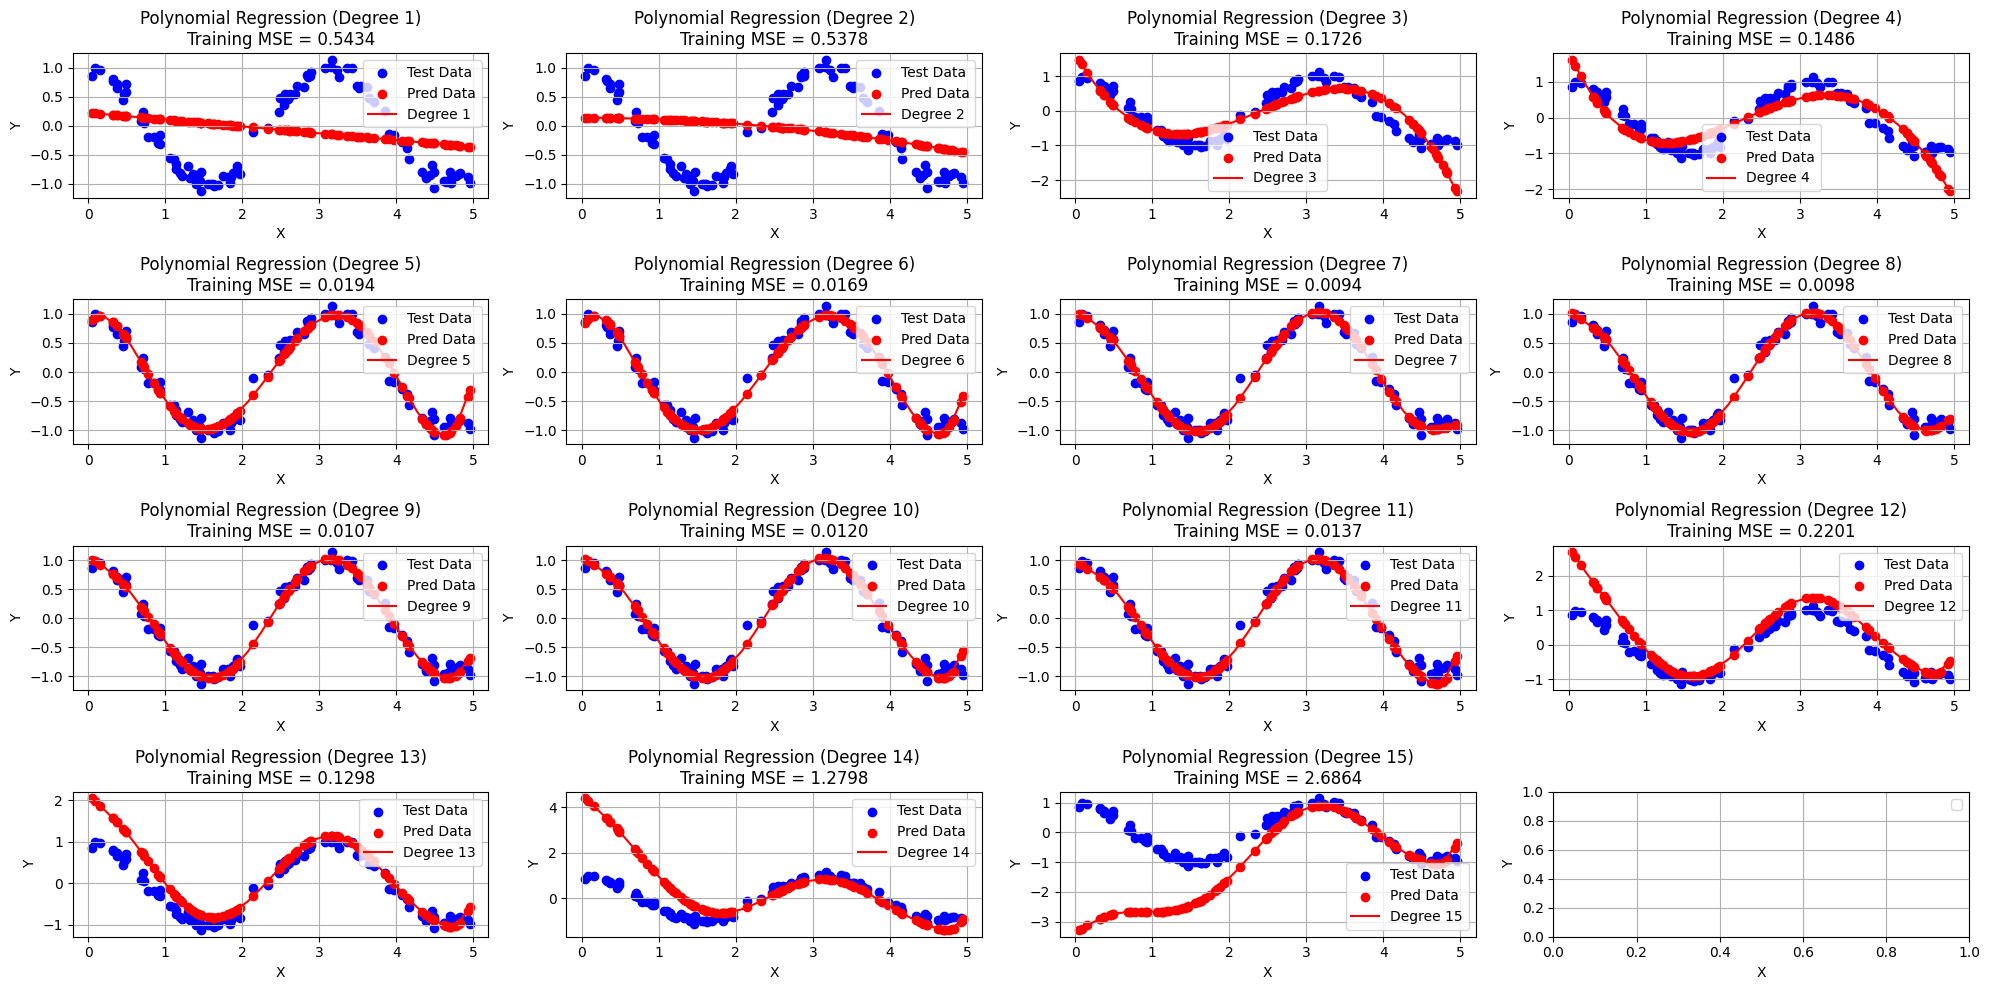

In [ ]:
data = {
    'X': X_test.flatten(),
    'Y': Y_test.flatten()
}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by='X', ascending=True)
X_test2 = df[['X']].values
Y_test2 = df['Y'].values

num_per_line = 4
fig, axes = plt.subplots(nrows=(15 + num_per_line - 1) // num_per_line, ncols=num_per_line, figsize=(20, 10))
test_mse = []
for i, deg in enumerate(range(1, 16)):
    A_poly = deg_poly(X_train.reshape(-1, 1), Y_train.reshape(-1, 1), deg)

    X_grid = np.linspace(min(X_test2), max(X_test2), 30).reshape(-1, 1)

    X_grid_poly = np.vander(X_grid.flatten(), deg + 1, increasing=True)

    X_test_poly = np.vander(X_test2.flatten(), deg + 1, increasing=True)
    Y_grid_pred = np.dot(X_grid_poly, A_poly.flatten())
    Y_test_pred = np.dot(X_test_poly, A_poly.flatten())

    mse = np.mean((Y_test.flatten() - Y_test_pred.flatten()) ** 2)
    test_mse.append(mse)
    print(mse)

    ax = axes[i // num_per_line, i % num_per_line]
    ax.scatter(X_test2, Y_test2, color='blue', label="Test Data")
    ax.scatter(X_test2, Y_test_pred, color='red', label="Pred Data")
    ax.plot(X_grid, Y_grid_pred, color='red', label=f"Degree {deg}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Polynomial Regression (Degree {deg})\nTraining MSE = {mse:.4f}")
    ax.legend()
    ax.grid(True)

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

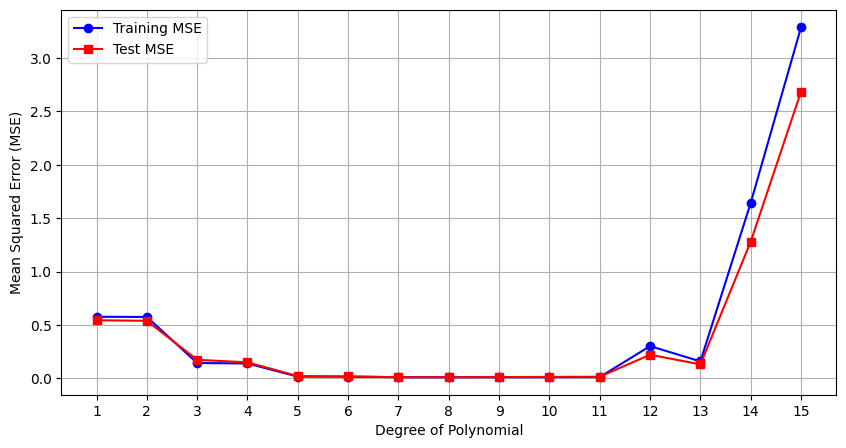

In [ ]:
degrees = list(range(1, 16))

plt.figure(figsize=(10, 5))
plt.plot(degrees, train_mse, label="Training MSE", marker='o', color='blue')
plt.plot(degrees, test_mse, label="Test MSE", marker='s', color='red')

plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("")
plt.xticks(degrees)
plt.legend()
plt.grid(True)

plt.show()


Moyenne des résidus absolus (noyau) : 0.0796


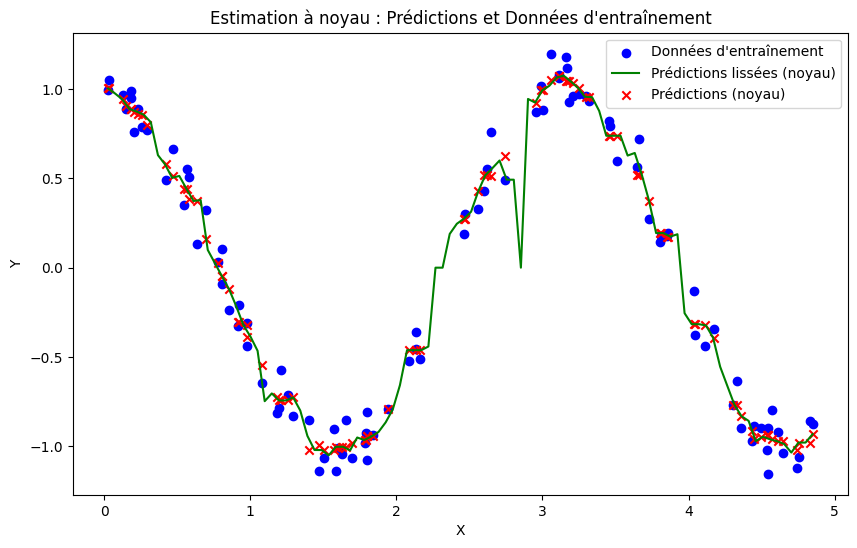

In [ ]:
data = {
    'X': X_train.flatten(),
    'Y': Y_train.flatten()
}
df = pd.DataFrame(data)
df_sorted = df.sort_values(by='X', ascending=True)

X_train2 = df[['X']].values
Y_train2 = df['Y'].values

lambda_ = 0.1

def kernel(x_i, x_j, lambda_):
    return 1 if np.abs(x_i - x_j) < lambda_ else 0

X_grid = np.linspace(min(X_train2), max(X_train2), 100).reshape(-1, 1)

y_grid_pred = []
for i in range(len(X_grid)):
    weights = np.array([kernel(X_grid[i], X_train2[j], lambda_) for j in range(len(X_train2))])
    numerator = np.sum(weights * Y_train2)
    denominator = np.sum(weights)
    y_grid_pred.append(numerator / denominator if denominator > 0 else 0)

y_grid_pred = np.array(y_grid_pred)

y_pred_kernel = []
for i in range(len(X_train2)):
    weights = np.array([kernel(X_train2[i], X_train2[j], lambda_) for j in range(len(X_train2))])
    numerator = np.sum(weights * Y_train2)
    denominator = np.sum(weights)
    y_pred_kernel.append(numerator / denominator if denominator > 0 else 0)

y_pred_kernel = np.array(y_pred_kernel)
mra = np.mean(np.abs(y_pred_kernel - Y_train2))
print(f"Moyenne des résidus absolus (noyau) : {mra:.4f}")

plt.figure(figsize=(10, 6))

plt.scatter(X_train2, Y_train2, label="Données d'entraînement", color='blue')

plt.plot(X_grid, y_grid_pred, color='green', label="Prédictions lissées (noyau)")

plt.scatter(X_train2, y_pred_kernel, color='red', label="Prédictions (noyau)", marker='x')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimation à noyau : Prédictions et Données d'entraînement")
plt.legend()
plt.show()
